# Trabajando con los datos de 'Credit One'
## Construir y Evaluar los Modelos

### 1. Preparar el Entorno

#### a) Cargar las librerias

In [1]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

#### b) Cargar la información

In [2]:
# Load dataset
filename = '.\data\housing.data.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, names=names)

### 4.Evaluar algoritmos

#### a) Crear el  conjunto de datos de validación

In [3]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]

validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#### b) Opciones de prueba y métrica de evaluación

#### c) Evaluar Algoritmos: Linea Base
- Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet (EN).
- Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector Regression (SVR) and k-Nearest Neighbors (KNN).

In [6]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR(gamma='scale')))

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -21.631525 (9.363465)
LASSO: -26.531928 (11.293180)
EN: -28.059150 (12.200383)
KNN: -42.771637 (13.036758)
CART: -29.532281 (13.220246)
SVR: -67.799617 (28.838960)


#### d) Comparación de Algoritmos

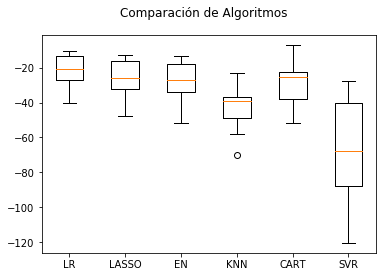

In [7]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Comparación de Algoritmos')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#### d) Evaluar Algoritmos: Estandarización

In [11]:
# Standardize the dataset
pipelines = []
pipelines.append(('SclLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('SclLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('SclEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('SclKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('SclCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('SclSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SclLR: -21.631525 (9.363465)
SclLASSO: -26.723720 (8.665979)
SclEN: -28.052969 (10.365705)
SclKNN: -20.077926 (10.866872)
SclCART: -27.551980 (15.154178)
SclSVR: -29.816804 (16.894605)


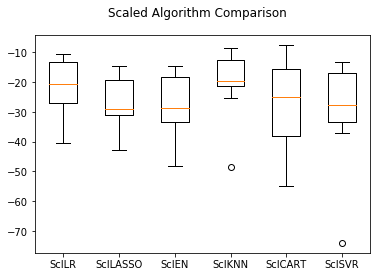

In [12]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 5. Mejorar las Métricas

#### a) Ajuste de algoritmo

In [14]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)

model = KNeighborsRegressor()

kfold = KFold(n_splits=num_folds, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.863201 using {'n_neighbors': 3}
-19.695693 (10.969044) with: {'n_neighbors': 1}
-18.863201 (12.559309) with: {'n_neighbors': 3}
-20.310407 (11.424970) with: {'n_neighbors': 5}
-21.019205 (12.347362) with: {'n_neighbors': 7}
-20.892672 (11.841188) with: {'n_neighbors': 9}
-21.260260 (11.862870) with: {'n_neighbors': 11}
-21.714709 (11.164851) with: {'n_neighbors': 13}
-22.364790 (11.988847) with: {'n_neighbors': 15}
-23.121928 (11.574725) with: {'n_neighbors': 17}
-24.225703 (11.680029) with: {'n_neighbors': 19}
-24.831910 (11.780850) with: {'n_neighbors': 21}


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### b) Conjuntos
- Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
- Bagging Methods: Random Forests (RF) and Extra Trees (ET).

In [17]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=100))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(n_estimators=100))])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -14.759213 (7.284908)
ScaledGBM: -9.558019 (4.198365)
ScaledRF: -13.054604 (6.877284)
ScaledET: -9.826435 (6.405984)


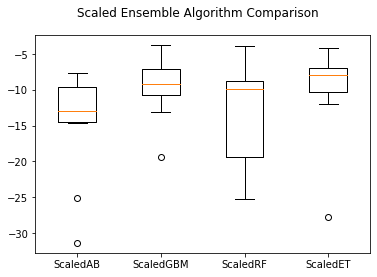

In [18]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#### b) Ajustes del algoritmo de conjuntos

In [19]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))

model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.021105 using {'n_estimators': 400}
-10.401888 (4.244916) with: {'n_estimators': 50}
-9.710914 (4.262991) with: {'n_estimators': 100}
-9.470518 (4.261637) with: {'n_estimators': 150}
-9.307096 (4.166941) with: {'n_estimators': 200}
-9.199640 (4.097660) with: {'n_estimators': 250}
-9.119404 (4.018480) with: {'n_estimators': 300}
-9.055413 (3.951048) with: {'n_estimators': 350}
-9.021105 (3.937119) with: {'n_estimators': 400}


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### 6. Finalizar modelo

#### a) Realizar predicciones sobre los datos de validación

In [20]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto', random_state=7,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [21]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

14.011670218473133


#### b) Seleccionar el modelo independiente

#### c) Salvar el modelo para nuevas predicciones